### Introduction to neural network classification with Tensorflow

In this notebook we're going to learn to write neural network for classification problems

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
1. Binary classification
2. Multiclass classification
3. Multilabel classification

In [82]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)


In [83]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [84]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [85]:
import pandas as pd

circle = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label': y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


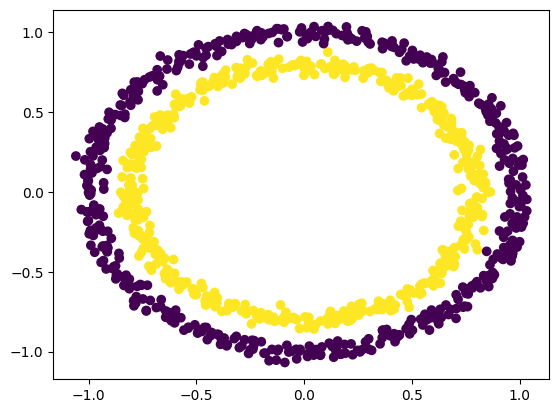

In [86]:
import matplotlib.pyplot as plt

plt.scatter(circle['X0'], circle['X1'], c=y)

In [87]:
from sklearn.model_selection import train_test_split

X = circle.drop('label', axis=1)
y = circle['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

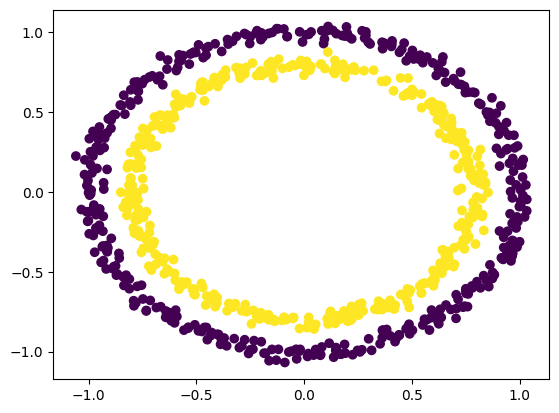

In [89]:
plt.scatter(X_train['X0'], X_train['X1'], c=y_train)

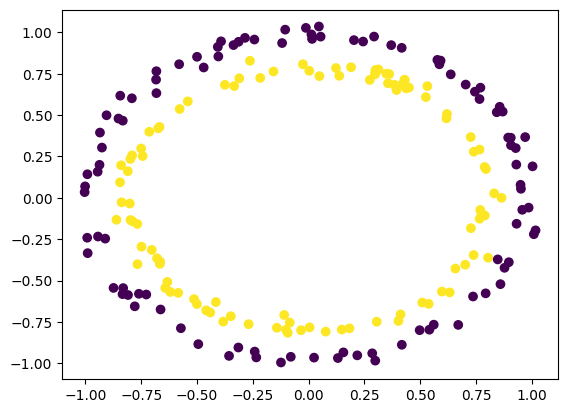

In [90]:
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)

In [91]:
import tensorflow as tf
# first classification model
tf.random.set_seed(42)

# create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5013 - loss: 0.7015   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5178 - loss: 0.6920 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6867  
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 0.6832 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5218 - loss: 0.6808 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5259 - loss: 0.6790  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 0.6776 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.6764 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5655 - loss: 0.6753 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 0.6744  
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.6735 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [92]:
model1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.5294  


[0.5345711708068848, 0.9549999833106995]

In [93]:
import numpy as np

In [94]:
x_min, x_max = X_train['X0'].min() - 0.1, X_train['X0'].max() + 0.1
y_min, y_max = X_train['X1'].min() - 0.1, X_train['X1'].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model1.predict(grid)

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [95]:
Z.shape

(53130, 1)

In [96]:
Z = Z.reshape(xx.shape)

In [97]:
Z.shape

(231, 230)

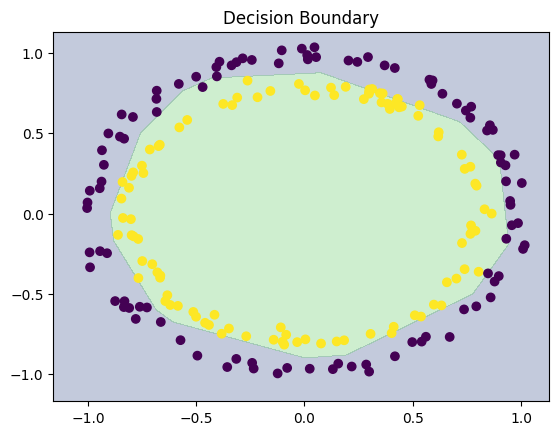

In [98]:
plt.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='viridis')
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)
plt.title('Decision Boundary')
plt.show()

In [99]:
def plot_contour(model, X, y):
  if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
  if isinstance(y, pd.DataFrame):
    y = y.to_numpy()

  if y.ndim == 2 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

  X0 = X[:, 0]
  X1 = X[:, 1]
  x_min, x_max = X0.min() - 0.1, X0.max() + 0.1
  y_min, y_max = X1.min() - 0.1, X1.max() + 0.1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                       np.arange(y_min, y_max, 0.05))

  grid = np.c_[xx.ravel(), yy.ravel()]
  Z = model.predict(grid)
  if Z.ndim > 1 and Z.shape[1] > 1:
    print('doing multiclass classification')
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    Z = np.round(Z).reshape(xx.shape)

  num_classes = len(np.unique(y))
  cmap = plt.get_cmap('RdYlBu', num_classes)

  plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.viridis, levels=np.arange(num_classes +1) - 0.5)
  plt.scatter(X0, X1, c=y, cmap=cmap, edgecolor='k')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title('Decision Boundary')
  plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


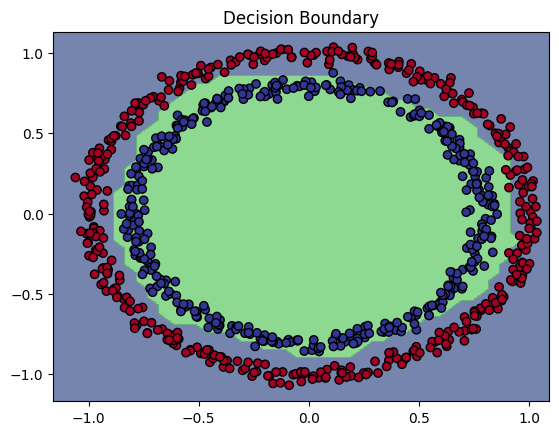

In [100]:
plot_contour(model=model1,
             X=X_train,
             y=y_train)

<Axes: >

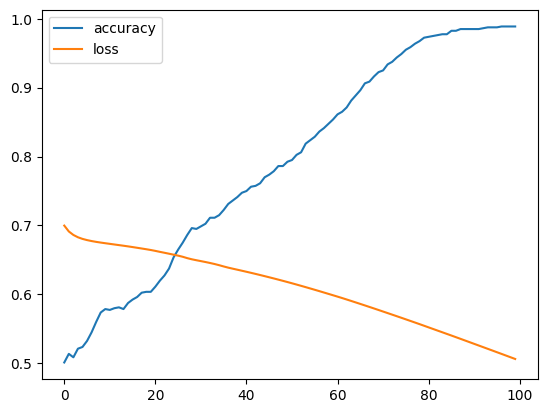

In [101]:
pd.DataFrame(history1.history).plot()

In [102]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.05, random_state=42)

In [103]:
X.shape, y.shape

((1000, 2), (1000,))

In [104]:
type(X)

numpy.ndarray

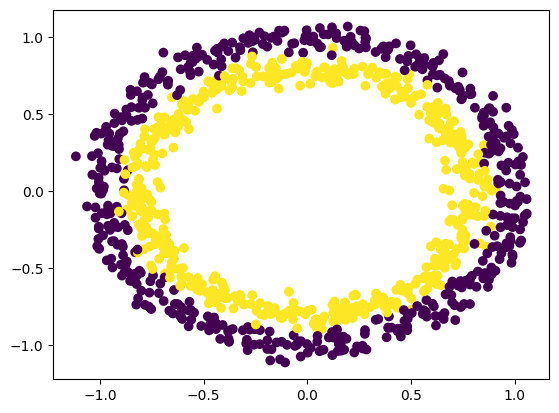

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [107]:
# start building the model
tf.random.set_seed(42)

# build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
# NOTE: we can pass the loss as :
# 1. loss=tf.keras.losses.binary_crossentropy
# 2. loss=tf.keras.losses.BinaryCrossentropy()
# 3. loss='binary_crossentropy'
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4922 - loss: 0.6972
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4862 - loss: 0.6953
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4818 - loss: 0.6942
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4692 - loss: 0.6934
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5074 - loss: 0.6928
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5025 - loss: 0.6921
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.6914
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6907 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4967 - loss: 0.6899  
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 0.6891 
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.6880 
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

<Axes: >

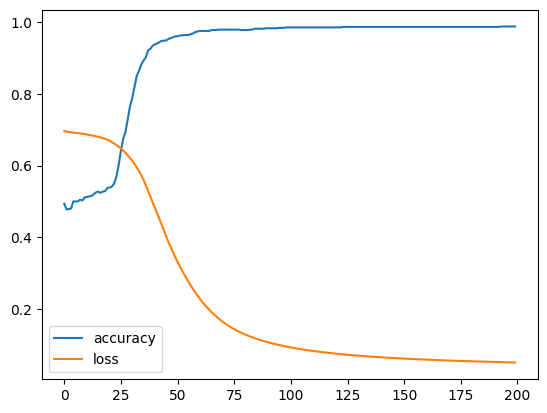

In [108]:
import pandas as pd
pd.DataFrame(history2.history).plot()

In [109]:
model2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9444 - loss: 0.1328  


[0.1513349860906601, 0.9350000023841858]

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification


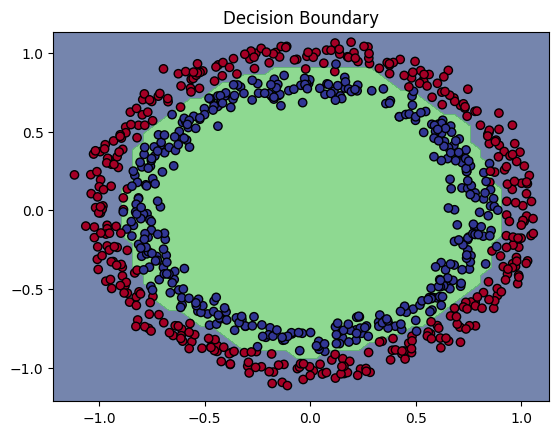

In [110]:
plot_contour(model=model2,
             X=X_train,
             y=y_train)

In [111]:
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 2
X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=3,
                  random_state=42,
                  cluster_std=2.5)

In [112]:
X.shape, y.shape

((1000, 2), (1000,))

In [113]:
X

array([[-6.17140751, -7.52737203],
       [-5.02438876, -6.13187814],
       [ 6.03569612,  2.16318316],
       ...,
       [ 2.26638161,  8.55412485],
       [ 3.11609833,  1.50574143],
       [-8.28504726, -7.40316428]])

In [114]:
type(y)

numpy.ndarray

In [115]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([334, 333, 333]))

In [116]:
n_labels = len(np.unique(y))
n_labels

3

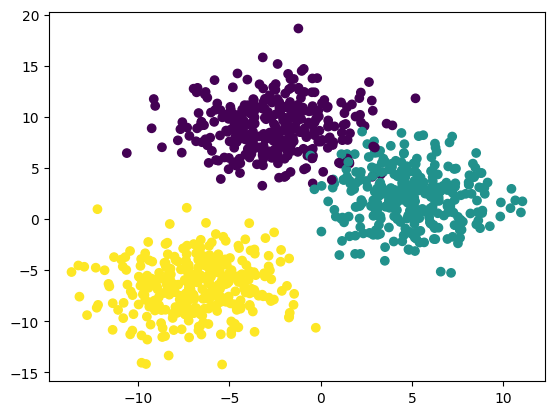

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')

In [118]:
from sklearn.model_selection import train_test_split

# for multiclass classification we need to first onehotencode y
y = np.eye(n_labels)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

800 200 800 200
(800, 2) (800, 3) (200, 2) (200, 3)


In [119]:
# start building the model
tf.random.set_seed(42)

# build the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(n_labels, activation='softmax'),
])

# compile the model
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history3 = model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3633 - loss: 2.0442
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 1.0841 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6671 - loss: 0.7124 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.5679  
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.4910 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.4438 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.4101 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.3825  
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.3560 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.3264 


In [120]:
model3.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.2735  


[0.26512381434440613, 0.9850000143051147]

10303/10303 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
doing multiclass classification


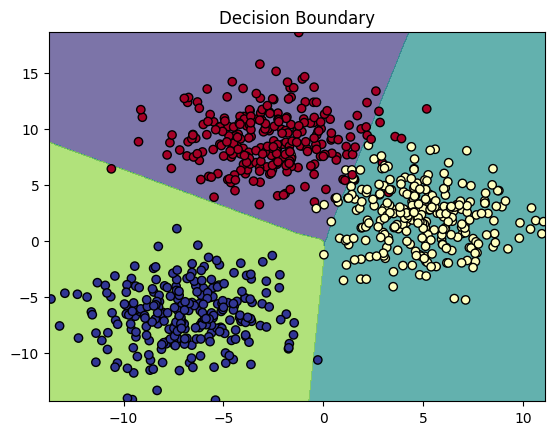

In [121]:
plot_contour(model=model3,
             X=X_train,
             y=y_train)

<Axes: >

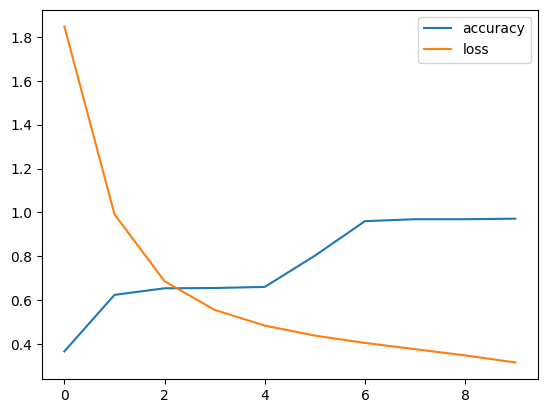

In [122]:
pd.DataFrame(history3.history).plot()